In [ ]:
from google.colab import files
uploaded = files.upload()

Saving kaggle.json to kaggle.json


In [ ]:
import os
print(os.getcwd())

/content


In [ ]:
file_paths = ['datasets/reviews_0-250.csv', 'datasets/data/reviews_0-250.csv']

In [ ]:
import os
# Create a directory for Kaggle
os.makedirs('~/.kaggle', exist_ok=True)
# Move the kaggle.json file to the appropriate directory
!cp kaggle.json ~/.kaggle/
# Set permissions for the file
!chmod 600 ~/.kaggle/kaggle.json

cp: cannot create regular file '/root/.kaggle/': Not a directory
chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory


In [ ]:
!kaggle datasets download -d nadyinky/sephora-products-and-skincare-reviews

Dataset URL: https://www.kaggle.com/datasets/nadyinky/sephora-products-and-skincare-reviews
License(s): Attribution 4.0 International (CC BY 4.0)
 91% 133M/147M [00:00<00:00, 242MB/s]
100% 147M/147M [00:00<00:00, 223MB/s]


In [ ]:
!unzip sephora-products-and-skincare-reviews.zip

Archive:  sephora-products-and-skincare-reviews.zip
  inflating: product_info.csv        
  inflating: reviews_0-250.csv       
  inflating: reviews_1250-end.csv    
  inflating: reviews_250-500.csv     
  inflating: reviews_500-750.csv     
  inflating: reviews_750-1250.csv    


In [ ]:
import pandas as pd

# Load each CSV file into a DataFrame
product_info_df = pd.read_csv('product_info.csv')
reviews_0_250_df = pd.read_csv('reviews_0-250.csv')
reviews_250_500_df = pd.read_csv('reviews_250-500.csv')
reviews_500_750_df = pd.read_csv('reviews_500-750.csv')
reviews_750_1250_df = pd.read_csv('reviews_750-1250.csv')
reviews_1250_end_df = pd.read_csv('reviews_1250-end.csv')

# Check the first few rows of each DataFrame to understand the structure
print("Product Info DataFrame:")
print(product_info_df.head())

print("\nReviews 0-250 DataFrame:")
print(reviews_0_250_df.head())

print("\nReviews 250-500 DataFrame:")
print(reviews_250_500_df.head())

print("\nReviews 500-750 DataFrame:")
print(reviews_500_750_df.head())

print("\nReviews 750-1250 DataFrame:")
print(reviews_750_1250_df.head())

print("\nReviews 1250-End DataFrame:")
print(reviews_1250_end_df.head())


<ipython-input-7-b505dba53e8e>:5: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  reviews_0_250_df = pd.read_csv('reviews_0-250.csv')
<ipython-input-7-b505dba53e8e>:8: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  reviews_750_1250_df = pd.read_csv('reviews_750-1250.csv')


Product Info DataFrame:
  product_id               product_name  brand_id brand_name  loves_count  \
0    P473671    Fragrance Discovery Set      6342      19-69         6320   
1    P473668    La Habana Eau de Parfum      6342      19-69         3827   
2    P473662  Rainbow Bar Eau de Parfum      6342      19-69         3253   
3    P473660       Kasbah Eau de Parfum      6342      19-69         3018   
4    P473658  Purple Haze Eau de Parfum      6342      19-69         2691   

   rating  reviews            size                      variation_type  \
0  3.6364     11.0             NaN                                 NaN   
1  4.1538     13.0  3.4 oz/ 100 mL  Size + Concentration + Formulation   
2  4.2500     16.0  3.4 oz/ 100 mL  Size + Concentration + Formulation   
3  4.4762     21.0  3.4 oz/ 100 mL  Size + Concentration + Formulation   
4  3.2308     13.0  3.4 oz/ 100 mL  Size + Concentration + Formulation   

  variation_value  ... online_only out_of_stock  sephora_exclusive  

<ipython-input-7-b505dba53e8e>:9: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  reviews_1250_end_df = pd.read_csv('reviews_1250-end.csv')


In [ ]:
# Concatenate all reviews DataFrames
all_reviews_df = pd.concat([
    reviews_0_250_df,
    reviews_250_500_df,
    reviews_500_750_df,
    reviews_750_1250_df,
    reviews_1250_end_df
], ignore_index=True)

# Check the combined DataFrame
print("\nAll Reviews DataFrame:")
print(all_reviews_df.head())


All Reviews DataFrame:
   Unnamed: 0    author_id  rating  is_recommended  helpfulness  \
0           0   1741593524       5             1.0          1.0   
1           1  31423088263       1             0.0          NaN   
2           2   5061282401       5             1.0          NaN   
3           3   6083038851       5             1.0          NaN   
4           4  47056667835       5             1.0          NaN   

   total_feedback_count  total_neg_feedback_count  total_pos_feedback_count  \
0                     2                         0                         2   
1                     0                         0                         0   
2                     0                         0                         0   
3                     0                         0                         0   
4                     0                         0                         0   

  submission_time                                        review_text  \
0      2023-02-01  I use t

In [ ]:
!pip install -q transformers nltk wordcloud seaborn

# Import libraries
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay

# Text preprocessing
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from wordcloud import WordCloud
from transformers import BertTokenizer, BertForSequenceClassification, Trainer, TrainingArguments, pipeline
import torch
from torch.utils.data import Dataset

# Download NLTK resources
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [ ]:
# Load dataset
df = pd.read_csv('/content/reviews_0-250.csv')  # Adjust path if necessary
df.dropna(inplace=True)
df.drop_duplicates(inplace=True)


In [ ]:
# Preprocessing and Labeling
df['label'] = df['is_recommended']
df['label'] = df['label'].apply(lambda x: 1 if x == 1 else 0)  # 1 for recommended, 0 for not recommended
df = df[['review_text', 'label']]

In [ ]:
df=df[:1000]

In [ ]:
# Text cleaning function
def clean_text(text):
    stop = set(stopwords.words('english'))
    lemma = WordNetLemmatizer()
    tokens = word_tokenize(text)
    tokens = [lemma.lemmatize(word.lower()) for word in tokens if word.isalpha() and word.lower() not in stop]
    return " ".join(tokens)

In [ ]:
# Apply cleaning
df['text'] = df['review_text'].apply(clean_text)

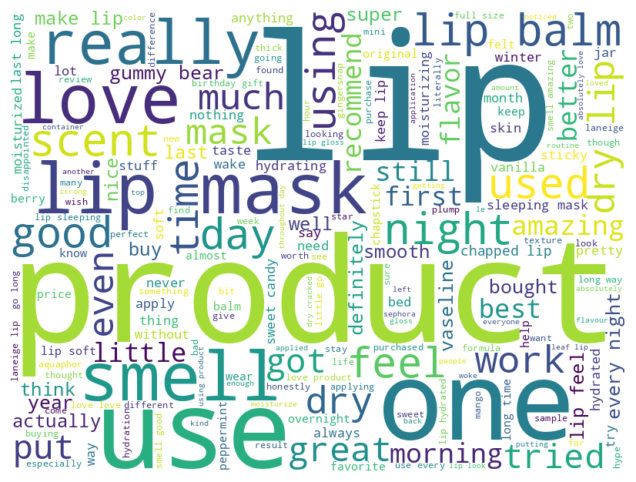

In [ ]:
# Visualize data
allwords = ' '.join(word for word in df['text'])
wordcloud = WordCloud(width=800, height=600, background_color='white').generate(allwords)
plt.figure(figsize=(8,6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [ ]:
# Split data
X = df['text']
y = df['label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Logistic Regression Baseline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression

In [ ]:
vec = TfidfVectorizer()
X_train_vec = vec.fit_transform(X_train)
X_test_vec = vec.transform(X_test)

In [ ]:
log_reg = LogisticRegression()
log_reg.fit(X_train_vec, y_train)
y_pred_log_reg = log_reg.predict(X_test_vec)

In [ ]:
# Evaluation function
def evaluation_metrics(y_true, y_pred, model_name):
    print(f"--- {model_name} ---")
    print("Accuracy:", accuracy_score(y_true, y_pred))
    print("Classification Report:")
    print(classification_report(y_true, y_pred))
    cm = confusion_matrix(y_true, y_pred)
    ConfusionMatrixDisplay(cm).plot()
    plt.title(f"Confusion Matrix for {model_name}")
    plt.show()

--- Logistic Regression Baseline ---
Accuracy: 0.775
Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.25      0.38        57
           1       0.77      0.99      0.86       143

    accuracy                           0.78       200
   macro avg       0.82      0.62      0.62       200
weighted avg       0.80      0.78      0.73       200



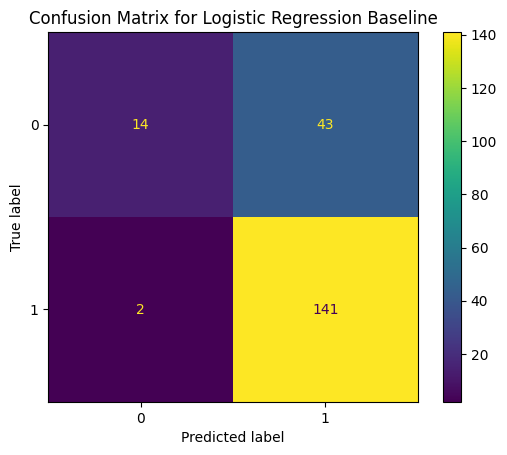

In [ ]:
evaluation_metrics(y_test, y_pred_log_reg, "Logistic Regression Baseline")

In [ ]:
# Initialize BERT tokenizer
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

In [ ]:
# Tokenization and formatting for PyTorch Dataset
class ReviewsDataset(Dataset):
    def __init__(self, texts, labels):
        self.encodings = tokenizer(texts.tolist(), truncation=True, padding=True, return_tensors='pt')
        self.labels = torch.tensor(labels.tolist())

    def __getitem__(self, idx):
        item = {key: val[idx] for key, val in self.encodings.items()}
        item['labels'] = self.labels[idx]
        return item

    def __len__(self):
        return len(self.labels)


In [ ]:
# Create Dataset objects
train_dataset = ReviewsDataset(X_train, y_train)
test_dataset = ReviewsDataset(X_test, y_test)

In [ ]:
# BERT model for fine-tuning
model = BertForSequenceClassification.from_pretrained("bert-base-uncased", num_labels=2)

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:

# Fine-tune BERT model
training_args = TrainingArguments(
    output_dir='./results',
    num_train_epochs=1,
    per_device_train_batch_size=8,
    per_device_eval_batch_size=8,
    evaluation_strategy="epoch",
    fp16=True  # Enable mixed precision training
)


trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=test_dataset
)

In [ ]:
# Train the model
trainer.train()

Epoch,Training Loss,Validation Loss
1,No log,0.527349


TrainOutput(global_step=100, training_loss=0.26751113891601563, metrics={'train_runtime': 1843.1916, 'train_samples_per_second': 0.434, 'train_steps_per_second': 0.054, 'total_flos': 75233317392000.0, 'train_loss': 0.26751113891601563, 'epoch': 1.0})

In [ ]:
# Evaluate BERT model
predictions = trainer.predict(test_dataset)
y_pred_bert = np.argmax(predictions.predictions, axis=1)

In [ ]:
# Evaluation function
def evaluation_metrics(y_true, y_pred, model_name):
    print(f"--- {model_name} ---")
    print("Accuracy:", accuracy_score(y_true, y_pred))
    print("Classification Report:")
    print(classification_report(y_true, y_pred))
    cm = confusion_matrix(y_true, y_pred)
    ConfusionMatrixDisplay(cm).plot()
    plt.title(f"Confusion Matrix for {model_name}")
    plt.show()

--- BERT Fine-Tuned ---
Accuracy: 0.84
Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.65      0.70        57
           1       0.87      0.92      0.89       143

    accuracy                           0.84       200
   macro avg       0.81      0.78      0.79       200
weighted avg       0.84      0.84      0.84       200



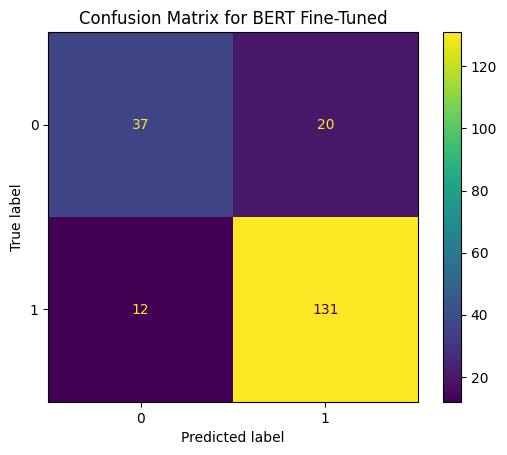

In [ ]:
evaluation_metrics(y_test, y_pred_bert, "BERT Fine-Tuned")

In [ ]:
#sample examples from dataset
import torch

def predict_sentiment(model, tokenizer, texts):
    model.eval()  # Set the model to evaluation mode
    predictions = []

    with torch.no_grad():  # No need to compute gradients
        # Tokenize the input texts
        inputs = tokenizer(texts, return_tensors='pt', truncation=True, padding=True, max_length=128)
        # Move inputs to the same device as model
        inputs = {key: val.to(model.device) for key, val in inputs.items()}

        # Get model outputs
        outputs = model(**inputs)
        # Get predicted class probabilities
        probs = torch.nn.functional.softmax(outputs.logits, dim=-1)
        # Get the predicted class (0 or 1)
        preds = torch.argmax(probs, dim=-1)

        predictions = preds.cpu().numpy()  # Move predictions to CPU and convert to numpy array

    return predictions
# Sample reviews
sample_reviews = [
    "I love this product. If you have dry chapped lip go for it. You are going to love this.",  # Expected: Positive
    "Unpopular opinion. Hated it. I have very chapped lips and this definitely made them worse. I tried to use it less frequently and it was still terrible.",  # Expected: Negative
    "This product gave me dry lips and left a dark patch on my lip!",  # Expected: Negative
    "Love this product! Use every night before bed and never get chapped lips!!",  # Expected: Positive
    "I bought this lip mask after reading the reviews and the hype. Unfortunately, it did not meet my expectations as vaseline petroleum jelly works way better for me.",# Expected: Negative
    "i love this product!! it leaves my lips so hydrated and the colour is immaculate"# Expected: Positive
]
# Run predictions
predicted_sentiments = predict_sentiment(model, tokenizer, sample_reviews)

# Define sentiment mapping for interpretation
sentiment_mapping = {0: 'Negative', 1: 'Positive'}

# Display results
for review, sentiment in zip(sample_reviews, predicted_sentiments):
    print(f' - Sentiment: {sentiment_mapping[sentiment]}')


 - Sentiment: Positive
 - Sentiment: Negative
 - Sentiment: Negative
 - Sentiment: Positive
 - Sentiment: Negative
 - Sentiment: Positive
